# Titanic 

In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sbs
import itertools

%matplotlib inline
sbs.set()

## Load Data

In [2]:
inputTitanic = pd.read_csv('train.csv')

In [3]:
inputTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Display Survival Rate by differents features

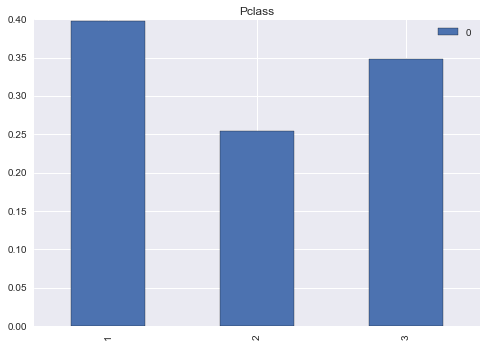

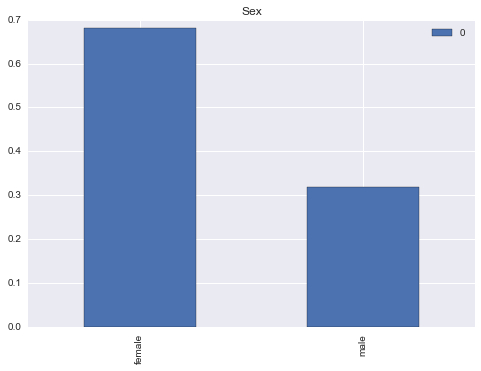

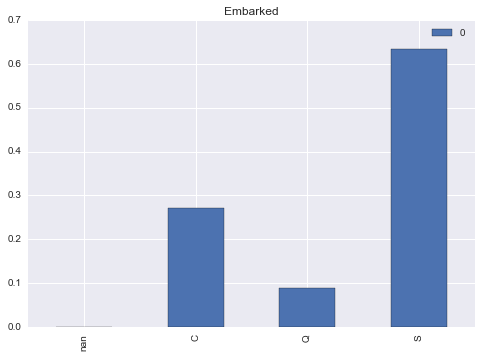

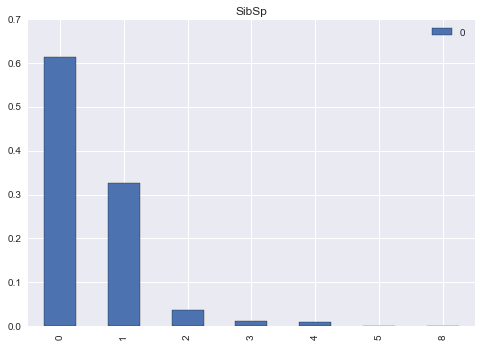

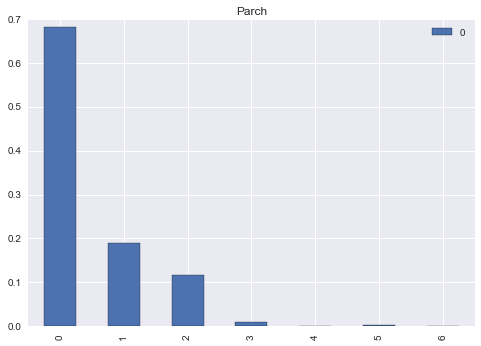

In [4]:
def DisplayRate(data, feature):
    ##Unique labels & values
    ser = data[feature]
    labels = sorted(set(ser))    
    values = pd.Series(0,index=labels)
    ##For each value calculate the rate
    total = sum(data.Survived)
    for l in labels:    
        values[l]=sum(data.Survived[ser==l])
    values=values/total
    ##Display a plot
    df = pd.DataFrame(values)
    df.plot.bar().set_title(feature)
    plt.show()    
    return
DisplayRate(inputTitanic,'Pclass')
DisplayRate(inputTitanic,'Sex')
DisplayRate(inputTitanic,'Embarked')
DisplayRate(inputTitanic,'SibSp')
DisplayRate(inputTitanic,'Parch')

### Add the familly numbers (parch+sibsp)

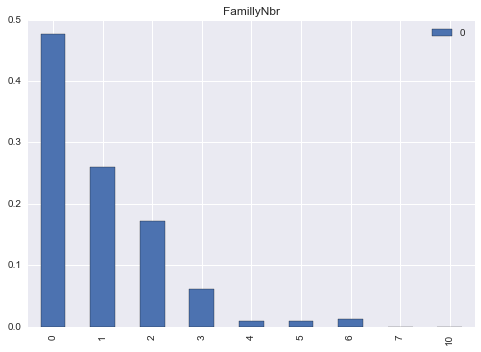

In [5]:
inputTitanic['FamillyNbr']=inputTitanic.Parch+inputTitanic.SibSp
inputTitanic.head(2)
DisplayRate(inputTitanic,'FamillyNbr')

### Clean Age data because values are missing
We add the median for empty values

In [6]:
ageFilled = inputTitanic.Age.fillna(inputTitanic.Age.median())
inputTitanic['AgeInteger']=map(lambda x:int(round(x)), ageFilled)
inputTitanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamillyNbr,AgeInteger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38


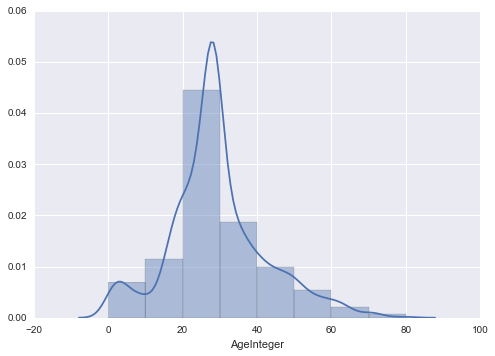

In [7]:
sbs.distplot(inputTitanic.AgeInteger,bins=8)


We transform into ranges to analyze more easily

In [8]:
inputTitanic['AgeRange']=inputTitanic['AgeInteger']//10*10

### Range for fare

In [9]:
#Display summary 
inputTitanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

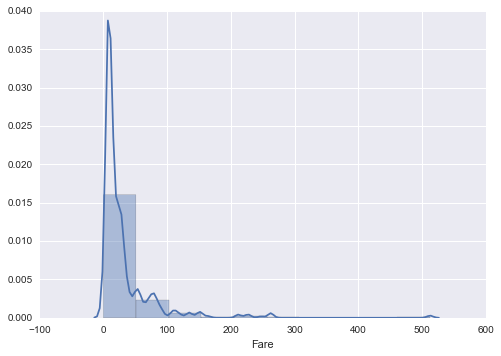

In [10]:
sbs.distplot(inputTitanic.Fare,bins=10)

In [11]:
inputTitanic['FareRange']=inputTitanic.Fare.apply(lambda x:100 if x>100 else x//10*10)

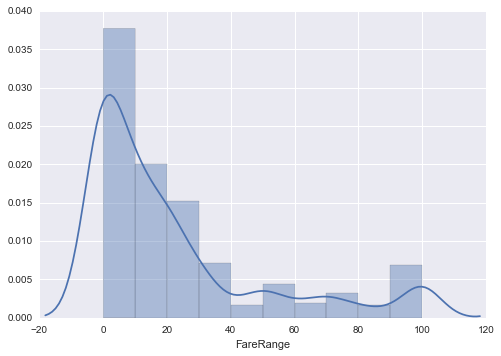

In [12]:
sbs.distplot(inputTitanic.FareRange,bins=10)

### Display survival rate per these two features

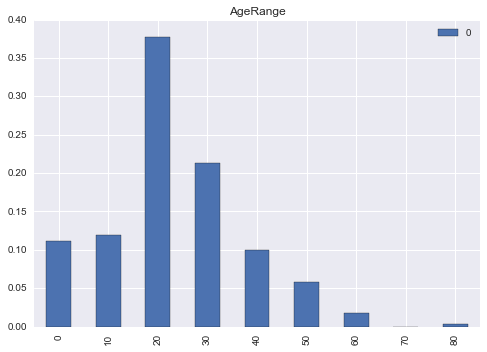

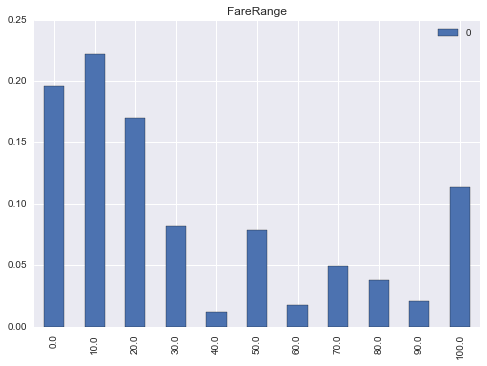

In [13]:
DisplayRate(inputTitanic,'AgeRange')
DisplayRate(inputTitanic,'FareRange')

# Predict manually
## Based on best looking features (most difference between survived and not)
### Sex & Familly & Age

In [143]:
#Group by
groupedData = inputTitanic.groupby(['Sex','FamillyNbr','AgeRange'])
#print(groupedData.get_group(('female',0,10)))
#print(groupedData.get_group(('female',0,10)).Survived.sum()+groupedData.get_group(('female',0,10)).count())
summary = groupedData['Survived'].agg({'SurvivedNumber':np.sum, 'Total':np.size})
summary['SurvivedRate']=summary['SurvivedNumber']/summary['Total']*100
summary.head(3)

SurvivedNumber  Total  SurvivedRate
Sex    FamillyNbr AgeRange                                     
female 0          0                      1      1    100.000000
                  10                    13     17     76.470588
                  20                    45     60     75.000000

Keep the one who survived >0.5

In [144]:
SurvivedCategories = summary[summary.SurvivedRate>50]
SurvivedCategories

SurvivedNumber  Total  SurvivedRate
Sex    FamillyNbr AgeRange                                     
female 0          0                      1      1    100.000000
                  10                    13     17     76.470588
                  20                    45     60     75.000000
                  30                    23     28     82.142857
                  40                    10     11     90.909091
                  50                     5      7     71.428571
                  60                     2      2    100.000000
       1          0                      3      4     75.000000
                  10                    15     18     83.333333
                  20                    25     32     78.125000
                  30                    12     13     92.307692
                  40                     6     10     60.000000
                  50                     8      8    100.000000
                  60                     2      2    100.000000
       2          0                      8      9     88.888889
                  10                     3      5     60.000000
                  20                    10     15     66.666667
                  30                    10     12     83.333333
                  40                     5      6     83.333333
                  50                     2      2    100.000000
       3          0                      6      7     85.714286
                  10                     1      1    100.000000
                  20                     4      6     66.666667
                  30                     4      4    100.000000
                  40                     1      1    100.000000
       4          10                     1      1    100.000000
                  50                     1      1    100.000000
       5          20                     3      3    100.000000
male   0          80                     1      1    100.000000
       1          0                      2      2    100.000000
       2          0                     13     13    100.000000
       3          0                      3      3    100.000000
                  10                     1      1    100.000000

And who died (if you have a 50% chance, I am not sure you'll survive so just say you'll die)

In [145]:
DeadCategories = summary[summary.SurvivedRate<50]
DeadCategories

SurvivedNumber  Total  SurvivedRate
Sex    FamillyNbr AgeRange                                     
female 4          0                      0      3      0.000000
                  20                     1      6     16.666667
                  40                     0      1      0.000000
       5          0                      0      2      0.000000
                  30                     0      1      0.000000
                  40                     0      2      0.000000
       6          0                      1      4     25.000000
       7          10                     0      1      0.000000
                  40                     0      1      0.000000
       10         20                     0      3      0.000000
male   0          10                     4     36     11.111111
                  20                    31    221     14.027149
                  30                    17     77     22.077922
                  40                     7     38     18.421053
                  50                     3     22     13.636364
                  60                     1     11      9.090909
                  70                     0      5      0.000000
       1          10                     1      5     20.000000
                  20                     6     31     19.354839
                  30                     4     18     22.222222
                  40                     5     12     41.666667
                  50                     0      5      0.000000
                  60                     0      1      0.000000
       2          10                     1      8     12.500000
                  20                     4     11     36.363636
                  30                     1      9     11.111111
                  40                     0      6      0.000000
                  50                     1      3     33.333333
                  70                     0      1      0.000000
       3          20                     0      4      0.000000
       4          0                      0      1      0.000000
                  10                     0      1      0.000000
                  20                     0      1      0.000000
       5          0                      0      8      0.000000
                  10                     0      4      0.000000
                  40                     0      1      0.000000
                  60                     0      1      0.000000
       6          0                      1      3     33.333333
                  30                     0      1      0.000000
       7          0                      0      2      0.000000
                  10                     0      2      0.000000
       10         20                     0      4      0.000000